# Ridge Linear Regression

**The Boston Housing Dataset**<br>

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.<br> The following describes the dataset columns:<br>

CRIM - per capita crime rate by town<br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.<br>
INDUS - proportion of non-retail business acres per town.<br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)<br>
NOX - nitric oxides concentration (parts per 10 million)<br>
RM - average number of rooms per dwelling<br>
AGE - proportion of owner-occupied units built prior to 1940<br>
DIS - weighted distances to five Boston employment centres<br>
RAD - index of accessibility to radial highways<br>
TAX - full-value property-tax rate per $10,000<br>
PTRATIO - pupil-teacher ratio by town<br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town<br>
LSTAT - % lower status of the population<br>
MEDV - Median value of owner-occupied homes in $1000's<br>

In [8]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score 
from sklearn.linear_model import Ridge
import os
os.chdir("/Users/darshmac/Documents/cdac/For DBDA/Advance Analytics/Datasets")

In [4]:
boston = pd.read_csv('Boston.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
bs_train,bs_test = train_test_split(boston,test_size=0.3,random_state=23)

In [6]:
X_train = bs_train.drop('medv',axis=True)
y_train = bs_train['medv']
X_test = bs_train.drop('medv',axis=True)
y_test = bs_train['medv']

In [18]:
alphas = [0.01,0.15,0.5,0.75,1,2,4,2.4]
scores=[]
for v in alphas:
    ridge = Ridge(alpha=0.5)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scr = r2_score(y_test,y_pred)
    scores.append(scr)

In [21]:
i_max = np.argmax(scores)
print("Best Alpha:",alphas[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: 0.01
Best Scores: 0.7519621594662479


In [22]:
sal = pd.read_csv("Salaries.csv")
sal

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Salary

In [32]:
dum_sal = pd.get_dummies(sal,drop_first=True)

In [33]:
dia_train,dia_test = train_test_split(dum_sal,random_state=23,test_size=0.3)

In [34]:
X_train = dia_train.drop('salary',axis=1)
y_train = dia_train['salary']
X_test = dia_test.drop('salary',axis=1)
y_test = dia_test['salary']

In [66]:
#alphas = [0.01,0.15,0.5,0.75,1,2,4,2.4]
alphas = np.linspace(0.001,15,20)
scores=[]
for v in alphas:
    ridge = Ridge(alpha=v)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    scr = r2_score(y_test,y_pred)
    scores.append(scr)
    print("Alpha=",v,"R2 =",scr)

Alpha= 0.001 R2 = 0.36399023348421145
Alpha= 0.790421052631579 R2 = 0.365311642376953
Alpha= 1.579842105263158 R2 = 0.36644823949543703
Alpha= 2.369263157894737 R2 = 0.3674178100308846
Alpha= 3.158684210526316 R2 = 0.36823602926915533
Alpha= 3.948105263157895 R2 = 0.36891679382624054
Alpha= 4.7375263157894745 R2 = 0.3694724854343011
Alpha= 5.5269473684210535 R2 = 0.3699141840675587
Alpha= 6.3163684210526325 R2 = 0.37025184237800546
Alpha= 7.1057894736842115 R2 = 0.3704944301233539
Alpha= 7.895210526315791 R2 = 0.3706500549880667
Alpha= 8.68463157894737 R2 = 0.37072606458880575
Alpha= 9.474052631578948 R2 = 0.3707291333026824
Alpha= 10.263473684210526 R2 = 0.37066533671853197
Alpha= 11.052894736842106 R2 = 0.3705402158936695
Alpha= 11.842315789473686 R2 = 0.3703588331371934
Alpha= 12.631736842105264 R2 = 0.3701258206919804
Alpha= 13.421157894736842 R2 = 0.36984542342051807
Alpha= 14.210578947368422 R2 = 0.36952153639309837
Alpha= 15.0 R2 = 0.36915773811530617


In [67]:
i_max = np.argmax(scores)
print("Best Alpha:",alphas[i_max])
print("Best Scores:",scores[i_max])

Best Alpha: 9.474052631578948
Best Scores: 0.3707291333026824


In [57]:
np.arange(0.001,10,0.5)

array([1.000e-03, 5.010e-01, 1.001e+00, 1.501e+00, 2.001e+00, 2.501e+00,
       3.001e+00, 3.501e+00, 4.001e+00, 4.501e+00, 5.001e+00, 5.501e+00,
       6.001e+00, 6.501e+00, 7.001e+00, 7.501e+00, 8.001e+00, 8.501e+00,
       9.001e+00, 9.501e+00])

In [56]:
np.linspace(0.001,5,20)#decide step value on its own

array([1.00000000e-03, 2.64105263e-01, 5.27210526e-01, 7.90315789e-01,
       1.05342105e+00, 1.31652632e+00, 1.57963158e+00, 1.84273684e+00,
       2.10584211e+00, 2.36894737e+00, 2.63205263e+00, 2.89515789e+00,
       3.15826316e+00, 3.42136842e+00, 3.68447368e+00, 3.94757895e+00,
       4.21068421e+00, 4.47378947e+00, 4.73689474e+00, 5.00000000e+00])

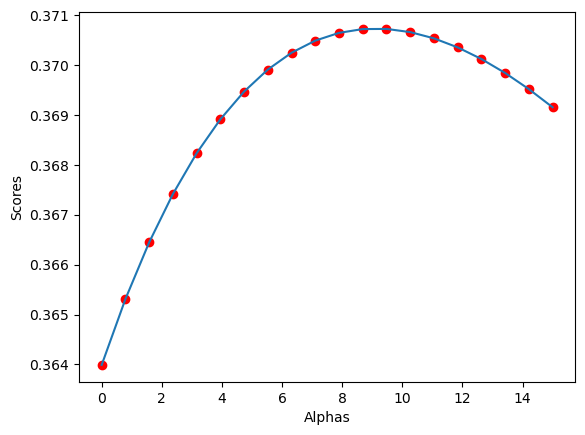

In [69]:
plt.plot(alphas,scores)
plt.scatter(alphas,scores,c='red')
plt.xlabel('Alphas')
plt.ylabel('Scores')
plt.show()